## Q-learning for stochastic world

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register

### make gym

In [15]:
env = gym.make('FrozenLake-v0')
env.render()

[2017-04-30 20:26:48,743] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG


In [58]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

### algorithm with learning rate

In [104]:
# initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# set learning parameters¶
num_episodes = 10000
d_factor = 0.90
l_rate = 0.7

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # q-table learning algorithm
    while not done:
        # method2: add random noise
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i+1))
        
        # get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # update q-table with new knowledge using learning rate
        Q[state, action] = (1-l_rate)*Q[state,action]+l_rate*(reward + d_factor*np.max(Q[new_state, :]))
        
        rAll += reward
        state = new_state
    rList.append(rAll)

### evaluate

success rate:  0.6167
final q-table values
left down right up
[[  8.62050865e-02   2.11464002e-03   2.24315517e-03   2.01145225e-03]
 [  1.16785322e-04   3.80575497e-04   2.36062471e-04   3.09535035e-02]
 [  3.47661969e-04   5.12319431e-04   3.36163084e-04   2.37265073e-02]
 [  1.39281412e-04   1.43455998e-04   1.15108628e-05   1.77478959e-02]
 [  2.70055995e-01   1.34695284e-03   1.34852970e-03   1.25345065e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.42284990e-03   3.93965708e-05   1.21357291e-04   5.16870284e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.42675858e-04   1.19709264e-04   3.43304046e-04   4.95564323e-01]
 [  4.45930329e-03   5.91926125e-01   1.11292252e-03   1.96803475e-04]
 [  2.02789439e-01   1.36766176e-03   1.41351193e-04   1.05965681e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.51483478e

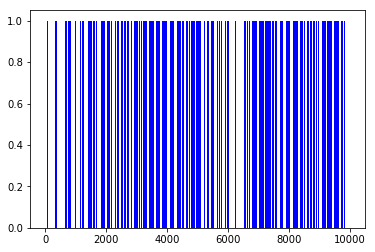

In [105]:
print('success rate: ', str(sum(rList)/num_episodes))
print('final q-table values')
print('left down right up')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()